In [2]:
import pandas as pd
import matplotlib as plt
from scipy.stats import t, f
import numpy as np
import statsmodels.api as sm
from Linear_Reg_Diagnostic import Linear_Reg_Diagnostic
import statsmodels.stats.outliers_influence as smoi


In [3]:
state = pd.read_csv('state.x77.csv', index_col=[0])

state.head()

,Population,Income,Illiteracy,Life Exp,Murder,HS Grad,Frost,Area
Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708
Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432
Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417
Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945
California,21198,5114,1.1,71.71,10.3,62.6,20,156361


array([[<Axes: xlabel='Population', ylabel='Population'>,
        <Axes: xlabel='Illiteracy', ylabel='Population'>,
        <Axes: xlabel='HS Grad', ylabel='Population'>,
        <Axes: xlabel='Income', ylabel='Population'>],
       [<Axes: xlabel='Population', ylabel='Illiteracy'>,
        <Axes: xlabel='Illiteracy', ylabel='Illiteracy'>,
        <Axes: xlabel='HS Grad', ylabel='Illiteracy'>,
        <Axes: xlabel='Income', ylabel='Illiteracy'>],
       [<Axes: xlabel='Population', ylabel='HS Grad'>,
        <Axes: xlabel='Illiteracy', ylabel='HS Grad'>,
        <Axes: xlabel='HS Grad', ylabel='HS Grad'>,
        <Axes: xlabel='Income', ylabel='HS Grad'>],
       [<Axes: xlabel='Population', ylabel='Income'>,
        <Axes: xlabel='Illiteracy', ylabel='Income'>,
        <Axes: xlabel='HS Grad', ylabel='Income'>,
        <Axes: xlabel='Income', ylabel='Income'>]], dtype=object)

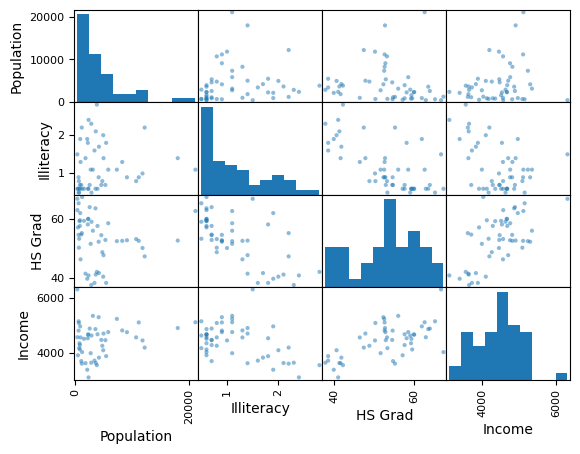

In [4]:
relevant = state[['Population', 'Illiteracy', 'HS Grad', 'Income']]
pd.plotting.scatter_matrix(relevant)

In [5]:
X = sm.add_constant(relevant[['Population', 'Illiteracy', 'HS Grad']].to_numpy())
Y = relevant['Income'].to_numpy()
model = sm.OLS(Y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     13.09
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           2.61e-06
Time:                        09:32:44   Log-Likelihood:                -376.05
No. Observations:                  50   AIC:                             760.1
Df Residuals:                      46   BIC:                             767.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1940.7411    710.645      2.731      0.0

we can infer that population and HS grad are connected to the income, and we can't infer that for illiteracy

2:

In [6]:
cls = Linear_Reg_Diagnostic(result)

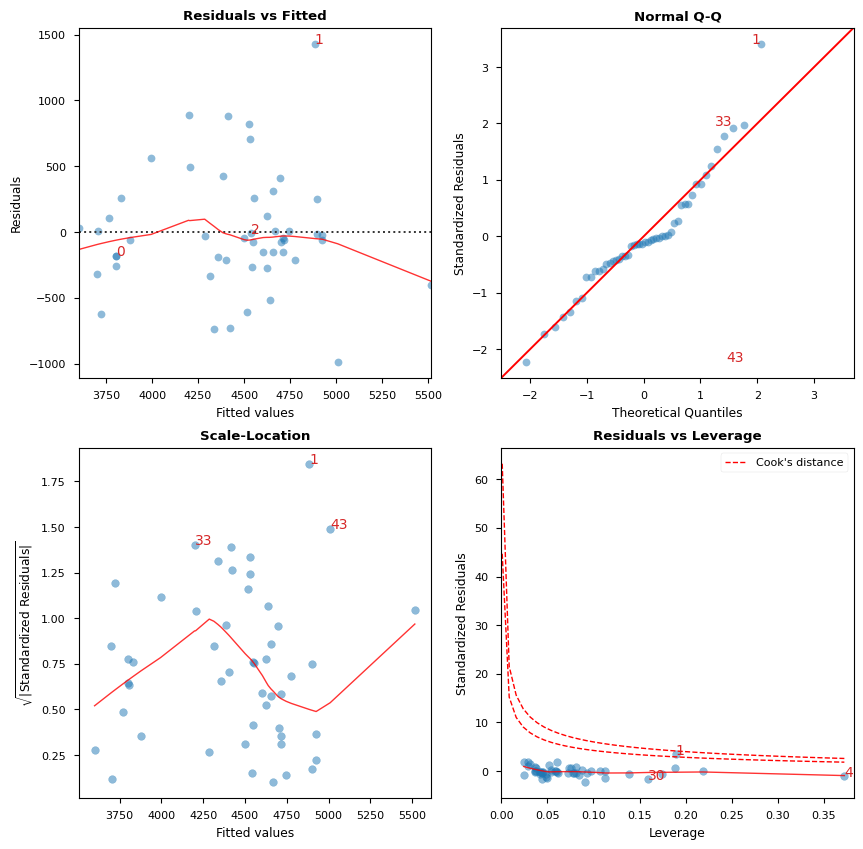

  Features  VIF Factor
1       x1        1.01
3       x3        1.76
2       x2        1.77
0    const      116.38


In [7]:
fig, ax = cls()

In [8]:
influ = smoi.OLSInfluence(result)
dffits = pd.Series(influ.dffits[0])
cook = pd.Series(influ.cooks_distance[0])


<Axes: >

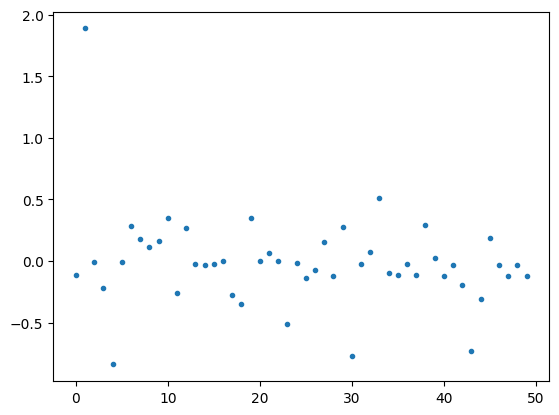

In [9]:
dffits.plot(style='.')

In [10]:
dffits = pd.Series(influ.dffits[0], index=relevant.index)
relevant[dffits > 0.5]

,Population,Illiteracy,HS Grad,Income
Alaska,365,1.5,66.7,6315
North Dakota,637,0.8,50.3,5087


<Axes: >

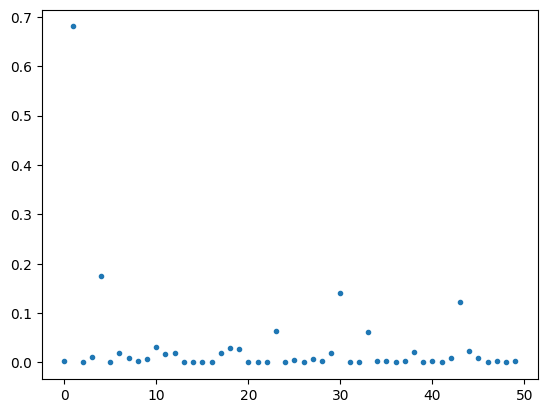

In [11]:
cook.plot(style='.')

In [12]:
cook = pd.Series(influ.cooks_distance[0], index=relevant.index)
relevant[cook > 0.1]


,Population,Illiteracy,HS Grad,Income
Alaska,365,1.5,66.7,6315
California,21198,1.1,62.6,5114
New Mexico,1144,2.2,55.2,3601
Utah,1203,0.6,67.3,4022


6:

In [13]:
lev = pd.Series(influ.hat_matrix_diag, index=relevant.index)
relevant[lev > 0.3]

,Population,Illiteracy,HS Grad,Income
California,21198,1.1,62.6,5114


7:


In [29]:
alpha = 0.05
n = X.shape[0]
p = X.shape[1]
t_crit = t.ppf(1 - alpha/(2*n), n - p - 1)

In [34]:
new_relevant = relevant[influ.resid_studentized_external < t_crit]

In [37]:
new_X = sm.add_constant(new_relevant[['Population', 'Illiteracy', 'HS Grad']].to_numpy())
new_Y = new_relevant['Income'].to_numpy()
new_model = sm.OLS(new_Y, new_X)
new_result = new_model.fit()
print(new_result.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     14.98
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           6.72e-07
Time:                        11:42:34   Log-Likelihood:                -361.87
No. Observations:                  49   AIC:                             731.7
Df Residuals:                      45   BIC:                             739.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2922.0046    669.846      4.362      0.0

In [38]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     13.09
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           2.61e-06
Time:                        11:42:38   Log-Likelihood:                -376.05
No. Observations:                  50   AIC:                             760.1
Df Residuals:                      46   BIC:                             767.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1940.7411    710.645      2.731      0.0

8:


In [39]:
influ = smoi.OLSInfluence(result)
